# Powerlifting Project

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

##### import the dataset

In [107]:
data_df =  pd.read_csv('openpowerlifting.csv/openpowerlifting.csv', low_memory=False)

##### From Stackoverflow, Need to be handle.<br>
##### The deprecated low_memory option<br>
The low_memory option is not properly deprecated, but it should be, since it does not actually do anything differently[source]<br>
The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column.

##### Dtype Guessing (very bad)

Pandas can only determine what dtype a column should have once the whole file is read. This means nothing can really be parsed before the whole file is read unless you risk having to change the dtype of that column when you read the last value.

Consider the example of one file which has a column called user_id. It contains 10 million rows where the user_id is always numbers. Since pandas cannot know it is only numbers, it will probably keep it as the original strings until it has read the whole file.

##### Specifying dtypes (should always be done)
adding to the pd.read_csv() call will make pandas know when it starts reading the file.


### Quick look at the data structure 

In [108]:
data_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


### Quick description of the data

In [109]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

#### Attrubute of Missing Values and dtype:

In [110]:
def attr_missing_values(df: pd.DataFrame) -> Dict:
    missing = {col: (df[col].count(),df[col].dtype) for col in df if df[col].count() < 1423354 }
    return missing
    

In [111]:
attr_missing_values(data_df)

{'Age': (757527, dtype('float64')),
 'AgeClass': (786800, dtype('O')),
 'Division': (1415176, dtype('O')),
 'BodyweightKg': (1406622, dtype('float64')),
 'WeightClassKg': (1410042, dtype('O')),
 'Squat1Kg': (337580, dtype('float64')),
 'Squat2Kg': (333349, dtype('float64')),
 'Squat3Kg': (323842, dtype('float64')),
 'Squat4Kg': (3696, dtype('float64')),
 'Best3SquatKg': (1031450, dtype('float64')),
 'Bench1Kg': (499779, dtype('float64')),
 'Bench2Kg': (493486, dtype('float64')),
 'Bench3Kg': (478485, dtype('float64')),
 'Bench4Kg': (9505, dtype('float64')),
 'Best3BenchKg': (1276181, dtype('float64')),
 'Deadlift1Kg': (363544, dtype('float64')),
 'Deadlift2Kg': (356023, dtype('float64')),
 'Deadlift3Kg': (339947, dtype('float64')),
 'Deadlift4Kg': (9246, dtype('float64')),
 'Best3DeadliftKg': (1081808, dtype('float64')),
 'TotalKg': (1313184, dtype('float64')),
 'Wilks': (1304407, dtype('float64')),
 'McCulloch': (1304254, dtype('float64')),
 'Glossbrenner': (1304407, dtype('float64'))

#### Summary of each numerical attribute

In [112]:
data_df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,...,363544.000000,356023.000000,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,...,108.681438,162.680134,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


#### Categorical Data <br>
1. I take a look on the data that are object type.
2. Consider which are categorical attribute.
3. See if there is a cool stuff that i can see from them.

In [137]:
def is_object_type(series: pd.Series) -> bool:
    return series.dtype == 'O'

In [148]:
def object_dtype(df: pd.DataFrame)-> Dict[str, pd.Series]:
    """ return dict of pd.Series"""
    return {col: df[col].value_counts() for col in df if is_object_type(df[col])}
    

In [149]:
object_dtype(data_df)['Name'].head()

Alan Aerts        214
Jose Hernandez    204
Sverre Paulsen    191
Erik Rasmussen    186
Bonnie Aerts      165
Name: Name, dtype: int64

#### Histogram for numerical attribute 
<br>


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BodyweightKg'}>,
        <AxesSubplot:title={'center':'Squat1Kg'}>,
        <AxesSubplot:title={'center':'Squat2Kg'}>,
        <AxesSubplot:title={'center':'Squat3Kg'}>],
       [<AxesSubplot:title={'center':'Squat4Kg'}>,
        <AxesSubplot:title={'center':'Best3SquatKg'}>,
        <AxesSubplot:title={'center':'Bench1Kg'}>,
        <AxesSubplot:title={'center':'Bench2Kg'}>,
        <AxesSubplot:title={'center':'Bench3Kg'}>],
       [<AxesSubplot:title={'center':'Bench4Kg'}>,
        <AxesSubplot:title={'center':'Best3BenchKg'}>,
        <AxesSubplot:title={'center':'Deadlift1Kg'}>,
        <AxesSubplot:title={'center':'Deadlift2Kg'}>,
        <AxesSubplot:title={'center':'Deadlift3Kg'}>],
       [<AxesSubplot:title={'center':'Deadlift4Kg'}>,
        <AxesSubplot:title={'center':'Best3DeadliftKg'}>,
        <AxesSubplot:title={'center':'TotalKg'}>,
        <AxesSubplot:title={'center':'Wilks'}>,
      

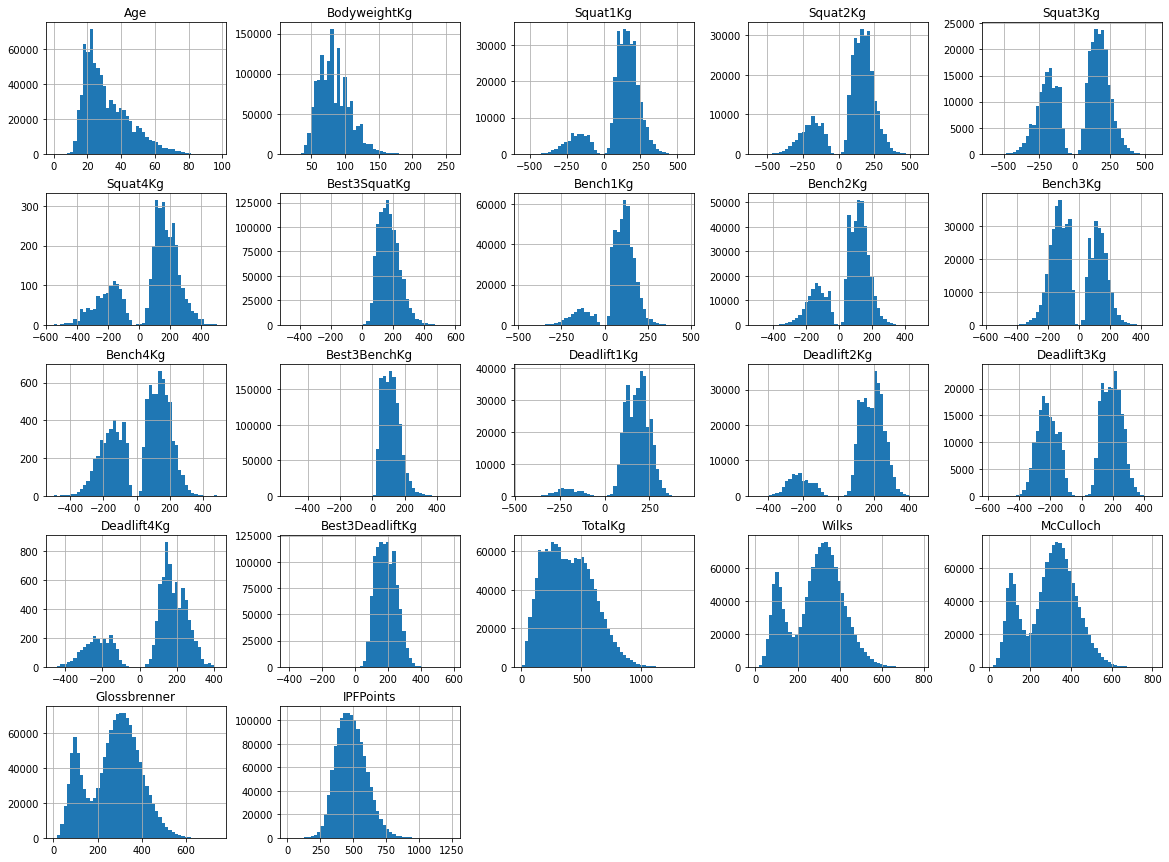

In [150]:
data_df.hist(bins=50, figsize=(20, 15))